# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('/content/Dataset_clustering.csv')
print(df.head())

   TransactionAmount      TransactionDate TransactionType   Location Channel  \
0              14.09  2023-04-11 16:29:14           Debit  San Diego     ATM   
1             376.24  2023-06-27 16:44:19           Debit    Houston     ATM   
2             126.29  2023-07-10 18:16:08           Debit       Mesa  Online   
3             184.50  2023-05-05 16:32:11           Debit    Raleigh  Online   
4              13.45  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4         26.0            Student                198.0            1.0   

   AccountBalance  Cluster  
0         5112.21        0  
1        13758.91     

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
if 'Cluster' not in df.columns:
    raise ValueError("Kolom 'Cluster' tidak ditemukan dalam dataset!")
X = df.drop(columns=['Cluster'])
y = df['Cluster']
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Jumlah data training: 1908
Jumlah data testing: 478


# **4. Membangun Model Klasifikasi**

## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
clf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

---

Random Forest Classifier
Algoritma utama yang digunakan untuk klasifikasi hasil clustering adalah Random Forest Classifier algoritma berbasis ensemble yang terdiri dari banyak decision tree untuk meningkatkan akurasi dan mengurangi overfitting. Random Forest Classifier terbukti menjadi algoritma yang kuat untuk tugas klasifikasi karena kemampuannya menangani data yang kompleks dan memberikan hasil yang stabil.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.6506
F1-Score: 0.5129
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       311
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00         7

    accuracy                           0.65       478
   macro avg       0.22      0.33      0.26       478
weighted avg       0.42      0.65      0.51       478



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


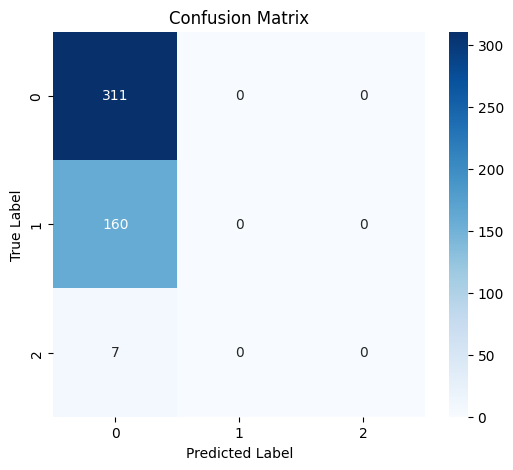

In [5]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

---

Evaluasi Model Random Forest
Sebelum tuning:

Akurasi: 65.06%

F1-Score: 51.29%

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Accuracy after tuning: 0.9100
F1-Score after tuning: 0.9006
Classification Report After Tuning:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       311
           1       0.98      0.78      0.86       160
           2       0.00      0.00      0.00         7

    accuracy                           0.91       478
   macro avg       0.62      0.59      0.60       478
weighted avg       0.90      0.91      0.90       478



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


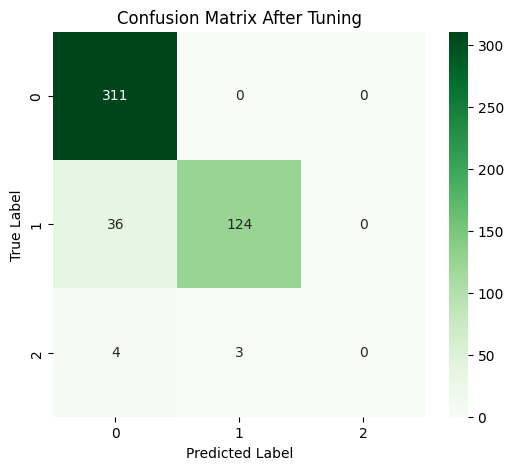

In [7]:
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy after tuning: {accuracy_best:.4f}")
print(f"F1-Score after tuning: {f1_best:.4f}")
print("Classification Report After Tuning:")
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix After Tuning")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

Berdasarkan hasil evaluasi model, berikut adalah metrik performa sebelum dan setelah tuning:

| Metrik              | Sebelum Tuning | Setelah Tuning |
|---------------------|---------------|---------------|
| **Akurasi**        | 0.6506 (65.06%) | 0.9100 (91%) |
| **F1-Score**       | 0.5129        | 0.9006         |


### 2. Identifikasi Kelemahan Model  
Berdasarkan evaluasi sebelum tuning:  
- Akurasi awal model hanya **65.06%**, menunjukkan bahwa model mengalami kesulitan dalam memprediksi beberapa kelas dengan baik.  
- F1-Score sebesar **0.5129** menandakan ketidakseimbangan dalam performa model terhadap berbagai kelas.  
- Confusion matrix menunjukkan bahwa ada banyak kesalahan klasifikasi antar kelas tertentu.  

Setelah tuning:  
- Akurasi meningkat signifikan menjadi **91%**, menunjukkan bahwa pemilihan hyperparameter yang lebih optimal telah meningkatkan performa model.  
- F1-Score naik menjadi **0.9006**, yang berarti model sekarang lebih seimbang dalam mengenali berbagai kelas.  

Namun, meskipun performa meningkat, model masih memiliki potensi overfitting, terutama jika hasil pada data uji sangat tinggi dibandingkan data latih.  

---

### 3. Rekomendasi Tindakan Lanjutan  
Untuk lebih meningkatkan model, beberapa tindakan yang bisa dilakukan:  
1. **Evaluasi Overfitting:**  
   - Bandingkan hasil pada data training dan testing untuk melihat apakah model terlalu menghafal data latih.  
   - Gunakan teknik **cross-validation** untuk memastikan generalisasi model.  

2. **Feature Selection & Engineering:**  
   - Analisis pentingnya fitur dengan menggunakan `feature_importances_` dari RandomForest untuk menghilangkan fitur yang kurang berkontribusi.  
   - Lakukan eksplorasi fitur tambahan yang bisa membantu meningkatkan prediksi.  

3. **Peningkatan Model dengan Teknik Lain:**  
   - Coba pendekatan **ensemble learning** lain seperti Gradient Boosting atau XGBoost untuk melihat apakah performa lebih meningkat.  
   - Gunakan **deep learning** jika dataset cukup besar dan kompleks.  

4. **Hyperparameter Tuning Lebih Lanjut:**  
   - Eksplorasi lebih banyak parameter seperti **max_features**, **bootstrap**, atau **class_weight** untuk menangani ketidakseimbangan data.  

5. **Handling Imbalanced Data (Jika Ada):**  
   - Jika confusion matrix menunjukkan ada kelas yang jarang terprediksi dengan baik, pertimbangkan teknik seperti **SMOTE (Synthetic Minority Over-sampling Technique)** atau penyesuaian **class weights**.  

---